In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load Data
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target
feature_name = 'sepal length (cm)' # The feature with a missing value

# Add a fake categorical feature
X['petal_category'] = pd.cut(X['petal length (cm)'], bins=[0, 3, 5, 8], labels=['Short', 'Medium', 'Long'])
X = X.drop(columns=['petal length (cm)']) # Drop the original numerical column
X_plot = X.copy()

# Add a missing value to the plotting copy
X_plot.loc[0, feature_name] = np.nan

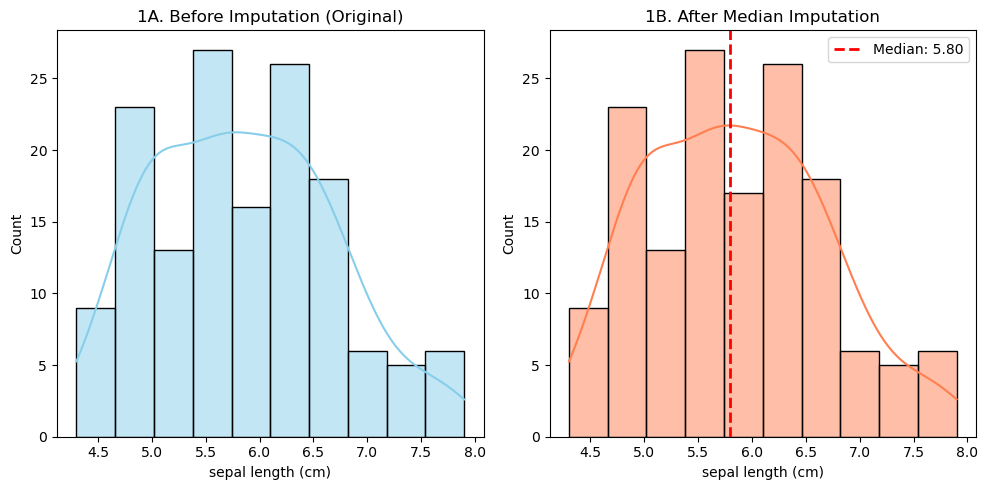

In [7]:
# --- IMPUTATION VISUALIZATION ---

# Create imputer and transform data
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X_plot[[feature_name]])
X_imputed_series = pd.Series(X_imputed.flatten(), name=feature_name)
imputed_value = imputer.statistics_[0]

plt.figure(figsize=(10, 5))

# Plot 1: Original (dropna removes the NaN)
plt.subplot(1, 2, 1)
sns.histplot(X_plot[feature_name].dropna(), bins=10, kde=True, color='skyblue')
plt.title(f'1A. Before Imputation (Original)')
plt.xlabel(feature_name)

# Plot 2: After Imputation
plt.subplot(1, 2, 2)
sns.histplot(X_imputed_series, bins=10, kde=True, color='coral')
# Add a vertical line for the median to show where the new point sits
plt.axvline(imputed_value, color='red', linestyle='--', linewidth=2, label=f'Median: {imputed_value:.2f}')
plt.title(f'1B. After Median Imputation')
plt.xlabel(feature_name)
plt.legend()

plt.tight_layout()
plt.show()

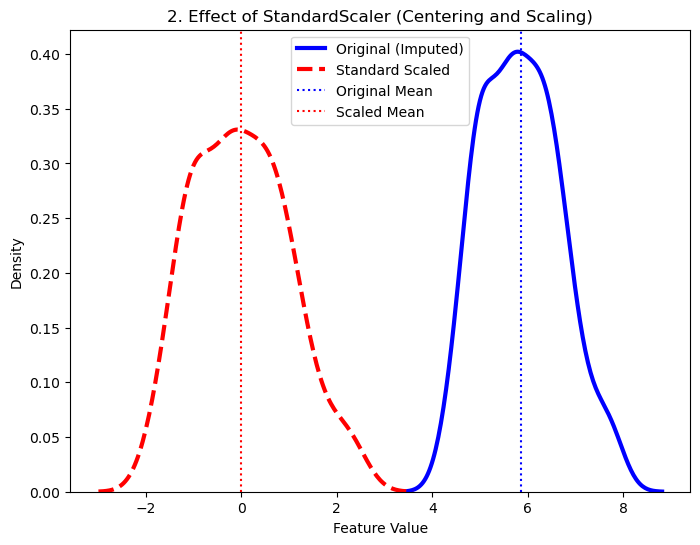

In [9]:
# --- SCALING VISUALIZATION ---

# Isolate the data after imputation (simulating the pipeline flow)
X_for_scaling = X_imputed_series.to_frame()

# Create scaler and transform data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_for_scaling)
X_scaled_series = pd.Series(X_scaled.flatten(), name=f'{feature_name} (Scaled)')

plt.figure(figsize=(8, 6))

# Plot KDEs on the same axis
sns.kdeplot(X_for_scaling[feature_name], label='Original (Imputed)', color='blue', linewidth=3)
sns.kdeplot(X_scaled_series, label='Standard Scaled', color='red', linestyle='--', linewidth=3)

# Add reference lines
plt.axvline(X_for_scaling.mean().iloc[0], color='blue', linestyle=':', label='Original Mean')
plt.axvline(X_scaled_series.mean(), color='red', linestyle=':', label='Scaled Mean')

plt.title('2. Effect of StandardScaler (Centering and Scaling)')
plt.xlabel('Feature Value')
plt.legend()
plt.show()

3A. Original Categorical Data (First 5 rows):
   petal_category
0          Short
1          Short
2          Short
3          Short
4          Short

3B. One-Hot Encoded Data (First 5 rows):
    petal_category_Short
0                   1.0
1                   1.0
2                   1.0
3                   1.0
4                   1.0


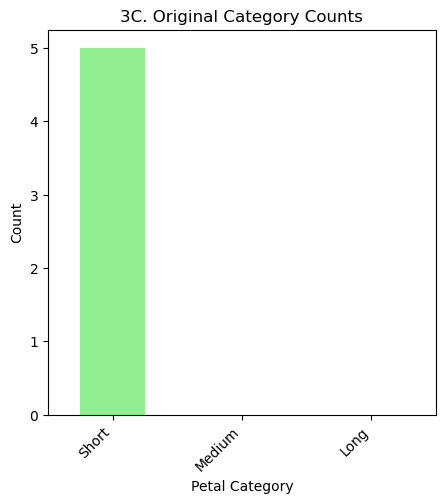

In [10]:
# --- ONE-HOT ENCODING VISUALIZATION ---

cat_feature = 'petal_category'
X_cat = X_plot[[cat_feature]].head(5).copy()

# Create encoder and transform data
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X_cat)
feature_names = encoder.get_feature_names_out([cat_feature])
X_encoded_df = pd.DataFrame(X_encoded, columns=feature_names, index=X_cat.index)

print("3A. Original Categorical Data (First 5 rows):\n", X_cat)
print("\n3B. One-Hot Encoded Data (First 5 rows):\n", X_encoded_df)

# Conceptual Visualization (Bar plot is less direct for OHE, so table/text is preferred, but a simple bar plot of counts can show the categories):
plt.figure(figsize=(5, 5))
X_cat[cat_feature].value_counts().plot(kind='bar', color=['lightgreen', 'gold', 'lightcoral'])
plt.title('3C. Original Category Counts')
plt.xlabel('Petal Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()